# TF1812 和 T1812 hedging

In [2]:
import pandas as pd

In [3]:
data_T = pd.read_csv('./data/T1812_data.csv',index_col = [0], usecols=['DATE','CLOSE'])
data_T.columns = ['T1812']
data_TF = pd.read_csv('./data/TF1812_data.csv',index_col = [0], usecols=['DATE','CLOSE'])
data_TF.columns = ['TF1812']

In [4]:
print(data_TF)

                     TF1812
DATE                       
2018-07-11 09:20:00  98.320
2018-07-11 09:25:00  98.320
2018-07-11 09:30:00  98.320
2018-07-11 09:35:00  98.310
2018-07-11 09:40:00  98.310
2018-07-11 09:45:00  98.250
2018-07-11 09:50:00  98.250
2018-07-11 09:55:00  98.205
2018-07-11 10:00:00  98.205
2018-07-11 10:05:00  98.205
2018-07-11 10:10:00  98.205
2018-07-11 10:15:00  98.205
2018-07-11 10:20:00  98.215
2018-07-11 10:25:00  98.210
2018-07-11 10:30:00  98.210
2018-07-11 10:35:00  98.210
2018-07-11 10:40:00  98.210
2018-07-11 10:45:00  98.210
2018-07-11 10:50:00  98.210
2018-07-11 10:55:00  98.210
2018-07-11 11:00:00  98.210
2018-07-11 11:05:00  98.210
2018-07-11 11:10:00  98.210
2018-07-11 11:15:00  98.210
2018-07-11 11:20:00  98.210
2018-07-11 11:25:00  98.210
2018-07-11 11:30:00  98.210
2018-07-11 13:05:00  98.190
2018-07-11 13:10:00  98.190
2018-07-11 13:15:00  98.190
...                     ...
2018-11-09 11:20:00  98.515
2018-11-09 11:25:00  98.525
2018-11-09 11:30:00 

In [7]:
data = pd.concat([data_T,data_TF],axis=1)
print(data)

                      T1812  TF1812
DATE                               
2018-07-11 09:20:00  95.750  98.320
2018-07-11 09:25:00  95.785  98.320
2018-07-11 09:30:00  95.800  98.320
2018-07-11 09:35:00  95.790  98.310
2018-07-11 09:40:00  95.780  98.310
2018-07-11 09:45:00  95.750  98.250
2018-07-11 09:50:00  95.745  98.250
2018-07-11 09:55:00  95.690  98.205
2018-07-11 10:00:00  95.690  98.205
2018-07-11 10:05:00  95.690  98.205
2018-07-11 10:10:00  95.690  98.205
2018-07-11 10:15:00  95.690  98.205
2018-07-11 10:20:00  95.690  98.215
2018-07-11 10:25:00  95.690  98.210
2018-07-11 10:30:00  95.690  98.210
2018-07-11 10:35:00  95.670  98.210
2018-07-11 10:40:00  95.670  98.210
2018-07-11 10:45:00  95.670  98.210
2018-07-11 10:50:00  95.670  98.210
2018-07-11 10:55:00  95.700  98.210
2018-07-11 11:00:00  95.715  98.210
2018-07-11 11:05:00  95.715  98.210
2018-07-11 11:10:00  95.670  98.210
2018-07-11 11:15:00  95.670  98.210
2018-07-11 11:20:00  95.650  98.210
2018-07-11 11:25:00  95.650 

In [34]:
data = data['2018-08-11 09:15:00':]
print(data)

                      T1812  TF1812
DATE                               
2018-08-13 09:20:00  95.220  98.045
2018-08-13 09:25:00  95.230  98.050
2018-08-13 09:30:00  95.255  98.060
2018-08-13 09:35:00  95.280  98.070
2018-08-13 09:40:00  95.235  98.040
2018-08-13 09:45:00  95.230  98.025
2018-08-13 09:50:00  95.230  98.005
2018-08-13 09:55:00  95.220  98.000
2018-08-13 10:00:00  95.215  97.985
2018-08-13 10:05:00  95.200  97.970
2018-08-13 10:10:00  95.215  97.970
2018-08-13 10:15:00  95.185  97.955
2018-08-13 10:20:00  95.125  97.905
2018-08-13 10:25:00  95.120  97.915
2018-08-13 10:30:00  95.070  97.885
2018-08-13 10:35:00  95.090  97.870
2018-08-13 10:40:00  95.050  97.870
2018-08-13 10:45:00  95.070  97.880
2018-08-13 10:50:00  95.085  97.880
2018-08-13 10:55:00  95.070  97.875
2018-08-13 11:00:00  95.035  97.855
2018-08-13 11:05:00  95.005  97.825
2018-08-13 11:10:00  94.960  97.795
2018-08-13 11:15:00  94.875  97.775
2018-08-13 11:20:00  94.895  97.805
2018-08-13 11:25:00  94.880 

In [15]:
def find_cointegration(data):
    n = data.shape[1]
    score_matrix = np.zeros((n,n))
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pair = []
    for i in range(n):
        for j in range(i+1,n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1,S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i,j] = pvalue
            if pvalue < 0.1:
                pair.append((keys[i],keys[j]))
    return score_matrix,pvalue_matrix,pair    

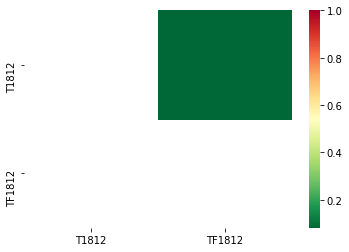

In [16]:
import numpy as np
from statsmodels.tsa.stattools import coint

scores, pvalues, pair = find_cointegration(data)


import seaborn

seaborn.heatmap(pvalues, xticklabels=['T1812','TF1812'], yticklabels=['T1812','TF1812'], cmap='RdYlGn_r'
                ,mask = (pvalues >= 0.1))
                

In [17]:
S1 = data['T1812']
S2 = data['TF1812']

const    40.252114
T1812     0.606661
dtype: float64


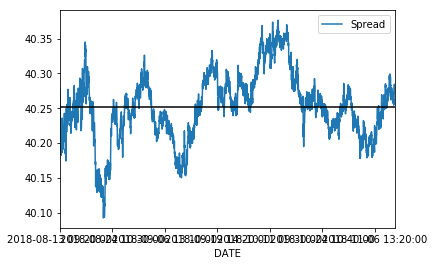

In [33]:
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

S1 = sm.add_constant(S1)
result = sm.OLS(S2,S1).fit()
b = result.params['T1812']
print(result.params)
spread = S2 - b * S1['T1812']
spread.plot()
plt.axhline(spread.mean(), color = 'black')
plt.legend(['Spread'])

In [25]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

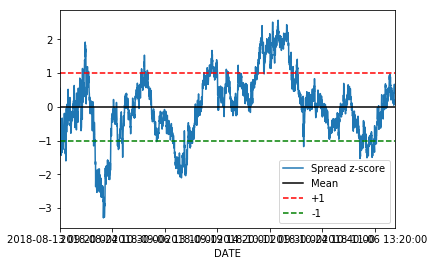

In [37]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(),color='black')
plt.axhline(1.0,color = 'red',linestyle = '--')
plt.axhline(-1.0,color = 'green',linestyle = '--')
plt.legend(['Spread z-score','Mean','+1','-1'])